In [2]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
eval_file_name = "qtb/qgye2/qeval.txt"

In [51]:
columns = ['epsilon_type','train_episodes','percent_dones','avg_steps']
qeval = pd.read_csv(eval_file_name, sep=";", header=None, names=columns)

In [47]:
qeval['train_episodes'] = qeval['train_episodes'] / 100
qeval.head()

In [40]:
evals={}
for e_type in 'abcdefg':
    eval_t = qeval[qeval['epsilon_type']==e_type].sort_values('train_episodes')[['train_episodes', 'percent_dones', 'avg_steps']]
    evals[e_type] = eval_t.set_index('train_episodes')
evals["a"].head()

,percent_dones,avg_steps
train_episodes,,
1.0,0.00,0.000000
2.0,0.33,7.000000
3.0,0.33,6.000000
4.0,4.00,8.416667
5.0,10.67,9.187500


Text(0.5, 0, 'train episodes')

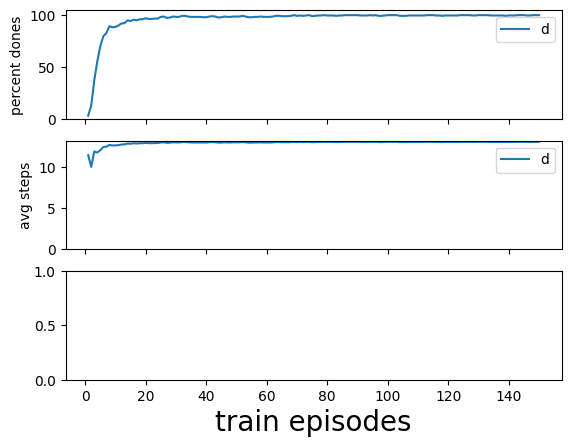

In [41]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

# ax1.set_title("percent dones", size = 20)
e='a'

ax1.plot(evals[e]['percent_dones'])
ax1.legend([e])
ax1.set_ylabel("percent dones")
ax1.set_ylim(bottom=0)

ax2.plot(evals[e]['avg_steps'])
ax2.legend([e])
ax2.set_ylabel("avg steps")
ax2.set_ylim(bottom=0)

ax2.set_xlabel("train episodes", size = 20)

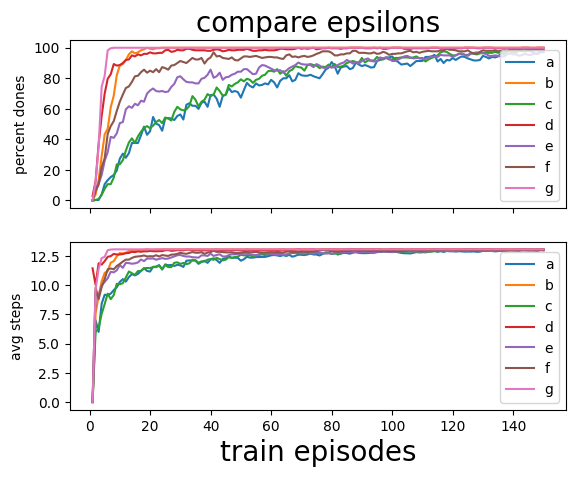

In [42]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

for e in evals:
    ax1.plot(evals[e]['percent_dones'])
    ax2.plot(evals[e]['avg_steps'])

ax1.set_title("compare epsilons", size = 20)

ax1.legend(evals.keys())
ax1.set_ylabel("percent dones")
# ax1.set_ylim(bottom=0)

ax2.legend(evals.keys())
ax2.set_ylabel("avg steps")
# ax2.set_ylim(bottom=0)
    
ax2.set_xlabel("train episodes", size = 20)

plt.show()

In [43]:
dones={}
for e_type in 'abcdefg':
    eval_t = qeval[(qeval['epsilon_type']==e_type) & (qeval['percent_dones']==100)].sort_values('train_episodes')[['train_episodes', 'avg_steps']]
    dones[e_type] = eval_t.set_index('train_episodes')
dones["b"].head()

,avg_steps
train_episodes,
19.0,13.07
24.0,13.07
25.0,13.07
26.0,13.07
27.0,13.07


In [44]:
q100 = qeval[qeval['percent_dones']==100]
q100.head()

,epsilon_type,train_episodes,percent_dones,avg_steps
3,g,102.0,100.0,13.07
8,g,67.0,100.0,13.07
9,b,118.0,100.0,13.07
12,d,102.0,100.0,13.07
14,g,60.0,100.0,13.07


In [45]:
q_min_episodes = q100.groupby(by=['epsilon_type']).aggregate({'train_episodes': ['min']})
q_min_episodes.head()

,train_episodes
,min
epsilon_type,
b,19.0
d,69.0
g,8.0


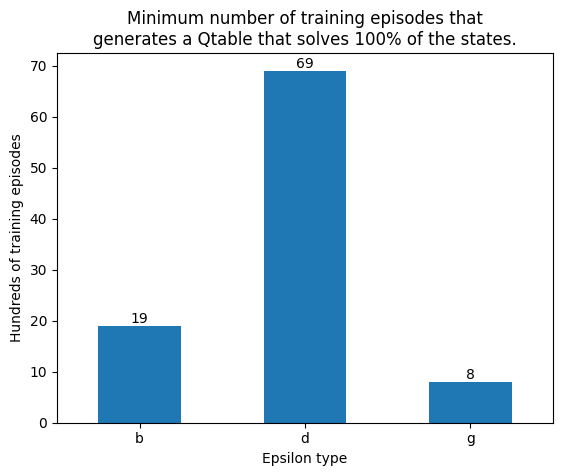

In [46]:
fig = q_min_episodes.plot(kind='bar', legend=False)
plt.title('Minimum number of training episodes that\ngenerates a Qtable that solves 100% of the states.')
plt.xlabel('Epsilon type')
plt.ylabel('Hundreds of training episodes')
plt.xticks(rotation=0)
fig.bar_label(fig.containers[0], label_type='edge')
plt.show()